**Rationale** In this assignment, you will practice specifying, running, and interpreting regressions involving non-linear functional forms and heterogeneous effects. You will be using the datasets located [here](https://drive.google.com/drive/folders/1SRMp4QhyXxfjOiR_CnbNQ1zMI1AuCjyp?usp=sharing).

1. Avocado dataset
1. Starbucks campaign data

In [1]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
##from google.colab import drive
##drive.mount('drive')

In [4]:
fpath = './' # change to your data folder
os.listdir(fpath)

['A7_F2021_Regression_2.ipynb',
 'starbucks_promos.csv',
 '.ipynb_checkpoints',
 'avocado.csv']

# Problem 1 (5 points) Avocado prices redux 

**Only use data for conventional types and remove the data for the region TotalUS**

First, write a loop through each unique region to plot the 
1. total volume vs. average price
1. total volume vs. average price$^2$
1. ln(Total Volume) vs average price
1. Total volume vs. ln(Average Price)
1. ln(Total Volume) vs ln(Average Price)

For each of the above 5 plots, the syntax should look something like:
```
for r in df.region.unique():
    temp = df[df.region==r]
    plt.scatter(....) # fill this in
```

1. Which of the plots of the relationship between price and demand looks most "linear?"

Using the avocado dataset, estimate the following demand models while accounting for the region effects (incl region in the regression):

1. level - level
1. level - Quadratic
1. level - log
1. log - level
1. log - log

Answer the following:
1. Succinctly interpret the **price coefficient** for each model (pay attention to corresponding p-values as well). 
1. Based on the log-log model, is the demand for avocados price elastic or inelastic? What does this mean?

In [6]:
# read in the dataset and replace column name spaces with underscores
avocado = pd.read_csv(fpath + 'avocado.csv', index_col = 0)
avocado.columns = [c.replace(' ', '_') for c in avocado.columns]
avocado.head(4)

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


In [30]:
# select regions that are not TotalUS e.g. region != 'TotalUS' and only conventional types

regions_df = avocado[avocado['region'] != 'TotalUS']
avocado = regions_df[regions_df['type'] == 'conventional']
avocado.head(5)

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [31]:
# check the unique regions to make sure TotalUS is not in the region column
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'West', 'WestTexNewMexico'], dtype=object)

In [32]:
# check the unique types to make sure there are only conventional types
avocado['type'].unique()

array(['conventional'], dtype=object)

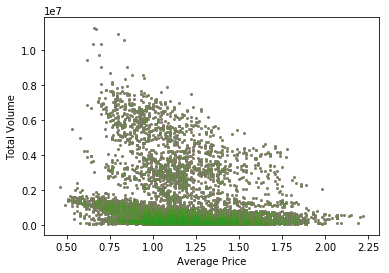

In [33]:
# write a loop to plot average price vs total volume and color each region differently
# e.g.:
# for r in avocado.region.unique():
#     temp = avocado.loc[avocado.region == r]
#     plt.scatter(..., ..., s= 1) # <- change this, make sure price is on the x-axis
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(avocado.AveragePrice, avocado.Total_Volume, s=1, alpha=.15, cmap='Rdy1Gn_r')
    plt.xlabel('Average Price')            
    plt.ylabel('Total Volume')


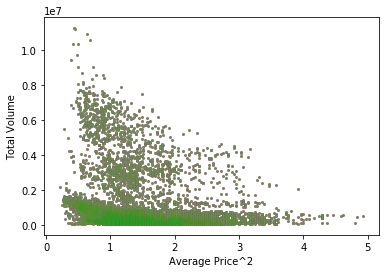

In [34]:
# do the same, but now plot AveragePrice^2 vs Total_Volume
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(((avocado.AveragePrice)**2), avocado.Total_Volume, s=1, alpha=.15, cmap='Rdy1Gn_r')
    plt.xlabel('Average Price^2')            
    plt.ylabel('Total Volume')

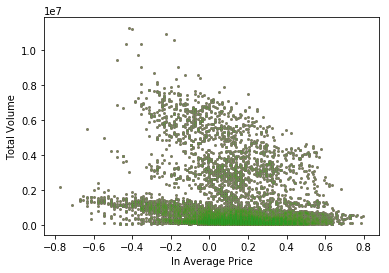

In [35]:
# do the same, but now plot ln(average price) vs. total volume
# remember np.log() takes the log
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(np.log(avocado.AveragePrice), avocado.Total_Volume, s=1, alpha=.15, cmap='Rdy1Gn_r')
    plt.xlabel('ln Average Price')            
    plt.ylabel('Total Volume')


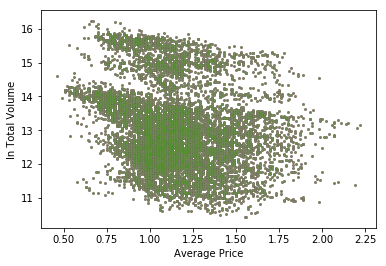

In [36]:
# do the same, but now plot AveragePrice vs ln(Total_Volume)
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(avocado.AveragePrice, (np.log(avocado.Total_Volume)), s=1, alpha=.15, cmap='Rdy1Gn_r')
    plt.xlabel('Average Price')            
    plt.ylabel('ln Total Volume')
    

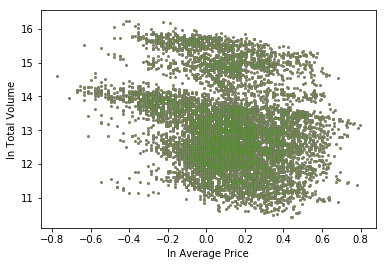

In [37]:
# do the same, but now plot ln(AveragePrice) vs ln(Total_Volume)
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(np.log(avocado.AveragePrice), np.log(avocado.Total_Volume), s=1, alpha=.15, cmap='Rdy1Gn_r')
    plt.xlabel('ln Average Price')            
    plt.ylabel('ln Total Volume')


**EDIT THIS CELL**

Which plot seems to exhibit the most linear relationship within each region? (i.e. dots of the same color seem to form closest to a straight line).

The plot that seems to exhibit the most linear relationship, is the **log of Average Price** vs. **Total Volume** plot. This suggests that the **Level-Log** model may be most appropriate.

(*models can be level-level, quadratic, log-log, level-log, log-level.*)

In [46]:
# run the level-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols('Total_Volume ~ AveragePrice + region', data =avocado).fit()
# print the regression table below
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:57:30   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.707e+05   3.61e+04     24.128      0.000       8e+05    9.41e+05
region[T.Atlanta]              2.584e+05   3.85e+04      6.714      0.000    1.83e+05    3.34e+05
region[T.BaltimoreWashington]  6.781e+05   3.82e+04     17.764      0.000    6.03e+05    7.53e+05
region[T.Boise]               -1.673e+05   3.85e+04     -4.349      0.000   -2.43e+05   -9.19e+04
region[T.Boston]                4.43e+05   3.82e+04     11.604      0.000    3.68e+05    5.18e+05
region[T.BuffaloRochester]     5.685e+04   3.82e+04      1.489      0.136    -1.8e+04    1.32e+05
region[T.California]           5.705e+06   3.84e+04    148.511      0.000    5.63e+06    5.78e+06
region[T.Charlotte]            6.794e+04   3.82e+04      1.779      0.075   -6927.768    1.43e+05
region[T.Chicago]              6.788e+05   3.82e+04     17.781      0.000    6.04e+05    7.54e+05
region[T.CincinnatiDayton]    -3.726e+04   3.86e+04     -0.964      0.335   -1.13e+05    3.85e+04
region[T.Columbus]            -8.654e+04   3.85e+04     -2.248      0.025   -1.62e+05   -1.11e+04
region[T.DallasFtWorth]        8.299e+05   3.92e+04     21.170      0.000    7.53e+05    9.07e+05
region[T.Denver]               5.345e+05   3.85e+04     13.890      0.000    4.59e+05     6.1e+05
region[T.Detroit]              1.369e+05   3.84e+04      3.567      0.000    6.17e+04    2.12e+05
region[T.GrandRapids]          6.879e+04   3.82e+04      1.802      0.072   -6045.467    1.44e+05
region[T.GreatLakes]           3.169e+06   3.83e+04     82.776      0.000    3.09e+06    3.24e+06
region[T.HarrisburgScranton]   9.375e+04   3.82e+04      2.454      0.014    1.89e+04    1.69e+05
region[T.HartfordSpringfield]  2.316e+05   3.82e+04      6.065      0.000    1.57e+05    3.06e+05
region[T.Houston]              7.838e+05   3.93e+04     19.950      0.000    7.07e+05    8.61e+05
region[T.Indianapolis]        -3.622e+04   3.83e+04     -0.945      0.345   -1.11e+05    3.89e+04
region[T.Jacksonville]        -1.512e+04   3.83e+04     -0.395      0.693   -9.01e+04    5.99e+04
region[T.LasVegas]             2.565e+04   3.86e+04      0.664      0.507   -5.01e+04    1.01e+05
region[T.LosAngeles]           2.618e+06   3.87e+04     67.590      0.000    2.54e+06    2.69e+06
region[T.Louisville]           -1.41e+05   3.84e+04     -3.669      0.000   -2.16e+05   -6.56e+04
region[T.MiamiFtLauderdale]    4.267e+05   3.82e+04     11.166      0.000    3.52e+05    5.02e+05
region[T.Midsouth]             2.727e+06   3.83e+04     71.285      0.000    2.65e+06     2.8e+06
region[T.Nashville]           -8.397e+04   3.86e+04     -2.173      0.030    -1.6e+05   -8233.353
region[T.NewOrleansMobile]     2.181e+04   3.85e+04      0.567      0.571   -5.36e+04    9.72e+04
region[T.NewYork]              1.309e+06   3.

**Edit this cell**

For the level-level regression, explain the coefficient for the price variable:

1. Answer here:  **The coefficient for the price variable are the values that are used to multiply the values of our independent/predictor variables in our model.  A positive coefficient means that as the predictor variable increases, the dependent variable also increases.  A negative sign, however, suggests an inverse relationship. And, holding all things constant, a greater magnitude of the coefficient means a greater magnitude of effect on the dependent/response variable.
**

In [47]:
# run the quadratic regression of Total Volume on Average Price and Average Price ^2
# while accounting for regions as an additional explanatory variable.

res = smf.ols(formula = 'Total_Volume ~ AveragePrice + region + I(AveragePrice**2)', data =avocado).fit()
# print the regression table below
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3286.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:57:39   Log-Likelihood:            -1.2690e+05
No. Observations:                8957   AIC:                         2.539e+05
Df Residuals:                    8902   BIC:                         2.543e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2.049e+06   7.62e+04     26.891      0.000     1.9e+06     2.2e+06
region[T.Atlanta]              2.433e+05   3.79e+04      6.426      0.000    1.69e+05    3.18e+05
region[T.BaltimoreWashington]  6.779e+05   3.75e+04     18.059      0.000    6.04e+05    7.51e+05
region[T.Boise]                -2.02e+05   3.79e+04     -5.332      0.000   -2.76e+05   -1.28e+05
region[T.Boston]               4.449e+05   3.75e+04     11.851      0.000    3.71e+05    5.19e+05
region[T.BuffaloRochester]     7.058e+04   3.75e+04      1.880      0.060   -3028.434    1.44e+05
region[T.California]           5.684e+06   3.78e+04    150.401      0.000    5.61e+06    5.76e+06
region[T.Charlotte]            7.749e+04   3.76e+04      2.063      0.039    3863.433    1.51e+05
region[T.Chicago]              6.314e+05   3.76e+04     16.778      0.000    5.58e+05    7.05e+05
region[T.CincinnatiDayton]    -8.788e+04   3.81e+04     -2.307      0.021   -1.63e+05   -1.32e+04
region[T.Columbus]            -1.074e+05   3.79e+04     -2.834      0.005   -1.82e+05   -3.31e+04
region[T.DallasFtWorth]        7.201e+05   3.91e+04     18.437      0.000    6.44e+05    7.97e+05
region[T.Denver]               5.157e+05   3.79e+04     13.622      0.000    4.41e+05     5.9e+05
region[T.Detroit]              1.227e+05   3.77e+04      3.251      0.001    4.87e+04    1.97e+05
region[T.GrandRapids]          2.986e+04   3.76e+04      0.794      0.427   -4.39e+04    1.04e+05
region[T.GreatLakes]           3.168e+06   3.76e+04     84.142      0.000    3.09e+06    3.24e+06
region[T.HarrisburgScranton]   1.146e+05   3.76e+04      3.049      0.002    4.09e+04    1.88e+05
region[T.HartfordSpringfield]  2.199e+05   3.76e+04      5.855      0.000    1.46e+05    2.93e+05
region[T.Houston]              6.574e+05   3.93e+04     16.725      0.000     5.8e+05    7.34e+05
region[T.Indianapolis]        -4.358e+04   3.77e+04     -1.156      0.248   -1.17e+05    3.03e+04
region[T.Jacksonville]        -2.659e+04   3.76e+04     -0.706      0.480      -1e+05    4.72e+04
region[T.LasVegas]            -8593.4367    3.8e+04     -0.226      0.821   -8.32e+04     6.6e+04
region[T.LosAngeles]           2.548e+06   3.83e+04     66.516      0.000    2.47e+06    2.62e+06
region[T.Louisville]           -1.57e+05   3.78e+04     -4.155      0.000   -2.31e+05   -8.29e+04
region[T.MiamiFtLauderdale]    4.167e+05   3.76e+04     11.089      0.000    3.43e+05     4.9e+05
region[T.Midsouth]             2.744e+06   3.76e+04     72.929      0.000    2.67e+06    2.82e+06
region[T.Nashville]           -1.166e+05    3.8e+04     -3.066      0.002   -1.91e+05   -4.21e+04
region[T.NewOrleansMobile]     2253.4989   3.78e+04      0.060      0.953   -7.19e+04    7.64e+04
region[T.NewYork]              1.291e+06   3.

**Edit this cell**

For the quadratic regression, explain the marginal effect of price (1 unit change in price leads to...) for the quadratic regression. Remember, you must consider that when price changes, so does price$^2$:

**1. Answer here: ** A 1 unit change in Price leads to the an increase in Total Volume in the amount of the square root of the unit change in price.**

In [49]:
# run the log-level regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols(formula = 'np.log(Total_Volume) ~ AveragePrice + region', data =avocado).fit()

# print the regression table below

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.975
Model:                              OLS   Adj. R-squared:                  0.975
Method:                   Least Squares   F-statistic:                     6552.
Date:                  Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                          21:58:30   Log-Likelihood:                 2047.2
No. Observations:                  8957   AIC:                            -3986.
Df Residuals:                      8903   BIC:                            -3603.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        12.1701      0.020    612.758      0.000      12.131      12.209
region[T.Atlanta]                 1.5741      0.021     74.299      0.000       1.533       1.616
region[T.BaltimoreWashington]     2.1526      0.021    102.463      0.000       2.111       2.194
region[T.Boise]                  -0.2486      0.021    -11.741      0.000      -0.290      -0.207
region[T.Boston]                  1.8056      0.021     85.929      0.000       1.764       1.847
region[T.BuffaloRochester]        0.3783      0.021     18.004      0.000       0.337       0.419
region[T.California]              4.0485      0.021    191.488      0.000       4.007       4.090
region[T.Charlotte]               0.7698      0.021     36.619      0.000       0.729       0.811
region[T.Chicago]                 2.1401      0.021    101.867      0.000       2.099       2.181
region[T.CincinnatiDayton]        0.8165      0.021     38.408      0.000       0.775       0.858
region[T.Columbus]                0.4566      0.021     21.549      0.000       0.415       0.498
region[T.DallasFtWorth]           2.3154      0.022    107.324      0.000       2.273       2.358
region[T.Denver]                  2.0047      0.021     94.657      0.000       1.963       2.046
region[T.Detroit]                 1.2354      0.021     58.485      0.000       1.194       1.277
region[T.GrandRapids]             0.6192      0.021     29.475      0.000       0.578       0.660
region[T.GreatLakes]              3.5204      0.021    167.070      0.000       3.479       3.562
region[T.HarrisburgScranton]      0.9253      0.021     44.007      0.000       0.884       0.967
region[T.HartfordSpringfield]     1.2018      0.021     57.184      0.000       1.161       1.243
region[T.Houston]                 2.2664      0.022    104.817      0.000       2.224       2.309
region[T.Indianapolis]            0.5378      0.021     25.485      0.000       0.496       0.579
region[T.Jacksonville]            0.5027      0.021     23.868      0.000       0.461       0.544
region[T.LasVegas]                1.0449      0.021     49.140      0.000       1.003       1.087
region[T.LosAngeles]              3.2630      0.021    153.041      0.000       3.221       3.305
region[T.Louisville]             -0.1233      0.021     -5.830      0.000      -0.165      -0.082
region[T.MiamiFtLauderdale]       1.7724      0.021     84.284      0.000       1.731       1.814
region[T.Midsouth]                3.3930      0.021    161.159      0.000       3.352       3.434
region[T.Nashville]               0.6027      0.021     28.346      0.000       0.561       0.644
region[T.NewOrleansMobile]        0.9266      0.021     43.779      0.000       0.885       0.968
region[T.NewYork]      

**Edit this cell**

For the log-level regression, explain the coefficient for the price variable:

1. Answer here: ** For log-level regression, if we change Price by 1 unit, we would expect Total Volume to change by 100 times the coefficient.**



In [50]:
# run the level-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols(formula = 'Total_Volume ~ np.log(AveragePrice) + region', data =avocado).fit()

# print the regression table below

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3308.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:06:12   Log-Likelihood:            -1.2695e+05
No. Observations:                8957   AIC:                         2.540e+05
Df Residuals:                    8903   BIC:                         2.544e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      3.072e+05   2.74e+04     11.228      0.000    2.54e+05    3.61e+05
region[T.Atlanta]              2.454e+05   3.81e+04      6.447      0.000    1.71e+05     3.2e+05
region[T.BaltimoreWashington]  6.784e+05   3.78e+04     17.969      0.000    6.04e+05    7.52e+05
region[T.Boise]               -1.886e+05   3.81e+04     -4.952      0.000   -2.63e+05   -1.14e+05
region[T.Boston]               4.428e+05   3.78e+04     11.727      0.000    3.69e+05    5.17e+05
region[T.BuffaloRochester]     6.139e+04   3.78e+04      1.626      0.104   -1.26e+04    1.35e+05
region[T.California]           5.691e+06    3.8e+04    149.773      0.000    5.62e+06    5.77e+06
region[T.Charlotte]            6.891e+04   3.78e+04      1.825      0.068   -5126.720    1.43e+05
region[T.Chicago]              6.678e+05   3.78e+04     17.688      0.000    5.94e+05    7.42e+05
region[T.CincinnatiDayton]     -6.46e+04   3.83e+04     -1.689      0.091    -1.4e+05    1.04e+04
region[T.Columbus]            -1.011e+05   3.81e+04     -2.654      0.008   -1.76e+05   -2.64e+04
region[T.DallasFtWorth]        7.717e+05    3.9e+04     19.793      0.000    6.95e+05    8.48e+05
region[T.Denver]               5.191e+05   3.81e+04     13.638      0.000    4.45e+05    5.94e+05
region[T.Detroit]              1.265e+05    3.8e+04      3.332      0.001    5.21e+04    2.01e+05
region[T.GrandRapids]          5.765e+04   3.78e+04      1.527      0.127   -1.64e+04    1.32e+05
region[T.GreatLakes]           3.165e+06   3.79e+04     83.604      0.000    3.09e+06    3.24e+06
region[T.HarrisburgScranton]   9.798e+04   3.78e+04      2.594      0.010    2.39e+04    1.72e+05
region[T.HartfordSpringfield]  2.301e+05   3.78e+04      6.093      0.000    1.56e+05    3.04e+05
region[T.Houston]              7.161e+05   3.91e+04     18.292      0.000    6.39e+05    7.93e+05
region[T.Indianapolis]        -4.363e+04   3.79e+04     -1.151      0.250   -1.18e+05    3.07e+04
region[T.Jacksonville]        -2.363e+04   3.79e+04     -0.624      0.532   -9.78e+04    5.06e+04
region[T.LasVegas]             3991.8179   3.82e+04      0.104      0.917    -7.1e+04    7.89e+04
region[T.LosAngeles]            2.58e+06   3.84e+04     67.181      0.000    2.51e+06    2.66e+06
region[T.Louisville]          -1.523e+05    3.8e+04     -4.009      0.000   -2.27e+05   -7.78e+04
region[T.MiamiFtLauderdale]    4.212e+05   3.78e+04     11.145      0.000    3.47e+05    4.95e+05
region[T.Midsouth]             2.729e+06   3.78e+04     72.163      0.000    2.66e+06     2.8e+06
region[T.Nashville]           -1.047e+05   3.82e+04     -2.740      0.006    -1.8e+05   -2.98e+04
region[T.NewOrleansMobile]     7022.8376    3.8e+04      0.185      0.854   -6.75e+04    8.16e+04
region[T.NewYork]              1.306e+06   3.

**Edit this cell**

For the level-log regression, explain the coefficient for the price variable:

1. Answer here: **If we increase the Price coefficient by 1 percent, we expect Total Volume to increase by the coefficient/100**

In [51]:
# run the log-log regression of Total Volume on Average Price 
# while accounting for regions as an additional explanatory variable.

res = smf.ols(formula = 'np.log(Total_Volume) ~ np.log(AveragePrice) + region', data =avocado).fit()
# print the regression table below
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.976
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                     6817.
Date:                  Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                          22:09:50   Log-Likelihood:                 2220.8
No. Observations:                  8957   AIC:                            -4334.
Df Residuals:                      8903   BIC:                            -3950.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        11.5966      0.015    776.570      0.000      11.567      11.626
region[T.Atlanta]                 1.5676      0.021     75.451      0.000       1.527       1.608
region[T.BaltimoreWashington]     2.1529      0.021    104.485      0.000       2.113       2.193
region[T.Boise]                  -0.2632      0.021    -12.663      0.000      -0.304      -0.222
region[T.Boston]                  1.8063      0.021     87.650      0.000       1.766       1.847
region[T.BuffaloRochester]        0.3819      0.021     18.532      0.000       0.342       0.422
region[T.California]              4.0404      0.021    194.821      0.000       4.000       4.081
region[T.Charlotte]               0.7723      0.021     37.463      0.000       0.732       0.813
region[T.Chicago]                 2.1291      0.021    103.328      0.000       2.089       2.169
region[T.CincinnatiDayton]        0.7974      0.021     38.196      0.000       0.756       0.838
region[T.Columbus]                0.4487      0.021     21.591      0.000       0.408       0.489
region[T.DallasFtWorth]           2.2702      0.021    106.687      0.000       2.228       2.312
region[T.Denver]                  1.9959      0.021     96.069      0.000       1.955       2.037
region[T.Detroit]                 1.2302      0.021     59.384      0.000       1.190       1.271
region[T.GrandRapids]             0.6090      0.021     29.552      0.000       0.569       0.649
region[T.GreatLakes]              3.5200      0.021    170.363      0.000       3.480       3.561
region[T.HarrisburgScranton]      0.9314      0.021     45.173      0.000       0.891       0.972
region[T.HartfordSpringfield]     1.1991      0.021     58.175      0.000       1.159       1.239
region[T.Houston]                 2.2124      0.021    103.553      0.000       2.171       2.254
region[T.Indianapolis]            0.5351      0.021     25.858      0.000       0.495       0.576
region[T.Jacksonville]            0.4979      0.021     24.100      0.000       0.457       0.538
region[T.LasVegas]                1.0313      0.021     49.424      0.000       0.990       1.072
region[T.LosAngeles]              3.2344      0.021    154.288      0.000       3.193       3.275
region[T.Louisville]             -0.1289      0.021     -6.218      0.000      -0.170      -0.088
region[T.MiamiFtLauderdale]       1.7691      0.021     85.775      0.000       1.729       1.810
region[T.Midsouth]                3.3981      0.021    164.633      0.000       3.358       3.439
region[T.Nashville]               0.5900      0.021     28.278      0.000       0.549       0.631
region[T.NewOrleansMobile]        0.9181      0.021     44.219      0.000       0.877       0.959
region[T.NewYork]      

**Edit this cell**

For the log-log regression, explain the meaning of the coefficient for the price variable:

1. Answer here: **If we change price by one percent we would expect Total Volum to increase by the coefficient/100.**

Based on the log-log regression, are avocados price-elastic or inelastic? What does this mean?


1. Answer here: **Avocados are price inelastic according to the log-log model since very little variation in demand occurs with change in price, according to this model.**


# Problem 2 (5 points)

Use the Starbucks promotions data. Filter the data to use only the rows satisfying all of the following conditions:

1. Transaction amount more than 0 and less than 50.
1. Income is not missing (df.income.notnull())

We suspect the average transaction value might be higher for individuals with higher incomes. We also suspect that the higher the offer difficulty (min. amount spend needed to redeem), the higher the spend. However, this effect might be different depending on income. Additionally, the offer type (buy one get one vs. discount) may impact the transaction amount. Moreover, this effect of the offer type may differ depending on income.

1. To capture all of these potential effects, run the following regression: 
$$
ln(\text{Trans Amt}) = \beta_0 + \beta_1 ln(\text{Inc}) + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer} + \beta_4 ln(\text{Inc})\times \text{difficulty} + \beta_5  ln(\text{Inc})\times \text{Disc Offer}+ e
$$

1. Succinctly interpret the regression results.

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the $\beta's$ in the equation above, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately ________% change in transaction amount. 
1. In terms of the $\beta's$ in the equation above, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to approximately ________% change in transaction amount. 

**Remember** the solution here is not as simple as looking at a single coefficient. The effect of income depends on offer type and difficulty.

Note, you can re-write the equation as:
$$
ln(\text{Trans Amt}) = \beta_0  + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer}  + \big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big] \times ln(\text{Inc})+ e
$$

Where the entire effect of $ln(income)$ on $ln(TransactionAmount)$ is captured by the expression $\big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big]$.

In [68]:
sb = pd.read_csv(fpath + 'starbucks_promos.csv', index_col=0) # read the starbucks data
sb.head(5)

,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1
4,005500a7188546ff8a767329a2f7c76a,offer received,0,M,56,20171209,47000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,NaN,NaN,0
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1


In [70]:
# select rows with transactions >0 but <50 and income is not missing
# replace sb with the result of the selection
sb.dropna(subset=['income'], inplace=True)
sb = sb.loc[(sb.transaction_amount >= 0) & (sb.transaction_amount <= 50)]
##sb.head(5)
##sb['transaction_amount'].max()
len(sb)


30695

In [74]:
# run the regression here, store the result as the variable res

res = smf.ols(formula = 'np.log(transaction_amount) ~ np.log(income) + difficulty + offer_type', data =sb).fit()
# print the regression table below
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(transaction_amount)   R-squared:                       0.397
Model:                                    OLS   Adj. R-squared:                  0.397
Method:                         Least Squares   F-statistic:                     6723.
Date:                        Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                                23:41:17   Log-Likelihood:                -21474.
No. Observations:                       30695   AIC:                         4.296e+04
Df Residuals:                           30691   BIC:                         4.299e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -9.8429      0.094   -105.100      0.000     -10.026      -9.659
offer_type[T.discount]    -0.2057      0.006    -32.670      0.000      -0.218      -0.193
np.log(income)             1.1199      0.008    132.529      0.000       1.103       1.136
difficulty                 0.0248      0.001     33.665      0.000       0.023       0.026
==============================================================================
Omnibus:                     8948.113   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34605.140
Skew:                          -1.416   Prob(JB):                         0.00
Kurtosis:                       7.364   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# print the result summary here, e.g. print(res.summary()):

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(transaction_amount)   R-squared:                       0.397
Model:                                    OLS   Adj. R-squared:                  0.397
Method:                         Least Squares   F-statistic:                     6723.
Date:                        Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                                23:37:45   Log-Likelihood:                -21474.
No. Observations:                       30695   AIC:                         4.296e+04
Df Residuals:                           30691   BIC:                         4.299e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -9.8429      0.094   -105.100      0.000     -10.026      -9.659
offer_type[T.discount]    -0.2057      0.006    -32.670      0.000      -0.218      -0.193
np.log(income)             1.1199      0.008    132.529      0.000       1.103       1.136
difficulty                 0.0248      0.001     33.665      0.000       0.023       0.026
==============================================================================
Omnibus:                     8948.113   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34605.140
Skew:                          -1.416   Prob(JB):                         0.00
Kurtosis:                       7.364   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the the estimated coefficients, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately _**.397 increase**___% **increase/decrease (choose one)** in transaction amount. 
1. In terms of the estimated coefficients, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to ___**21% decrease**___% **increase/decrease (choose one)** in transaction amount. 

**Basically,** substitute the $\beta's$ from the answer above with the estimated coefficients.